<a href="https://colab.research.google.com/github/ShreyJais/LLM/blob/main/Shreyansh_558_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#install and import requried modules

In [1]:
!pip install -U "tensorflow-text==2.13.*"

INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-

In [2]:
!pip install "tf-models-official==2.13.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 10.6 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=4eeaccf910f39cda8995c32b441152b430fc17e2399e306419c4c5da59f0373a
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [3]:
!pip install pydot

In [4]:
!pip install graphviz

#Download the IMDB dataset

In [2]:
import os
import shutil #high-level file operations module.

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [3]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)

84125825/84125825 [==============================] - 13s 0us/step


In [4]:
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
rand = 1

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=rand)

class_names = raw_train_ds.class_names
train_ds = raw_train_ds.cache().prefetch(buffer_size=AUTOTUNE)

raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=rand)

val_ds = raw_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

test_ds = raw_test_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


In [5]:
for text_batch, label_batch in train_ds.take(1):
  for i in range(5):
    print(f'Review: {text_batch.numpy()[i]}')
    label = label_batch.numpy()[i]
    print(f'Label : {label} ({class_names[label]})')

Review: b'Stupid and just plain weird movie about some kid who becomes traumatized when he finds out Santa isn\'t real (???). He grows up and becomes an adult (Brandon Maggart) who makes lists of people who are naughty or nice. One Christmas he snaps and sets out to kill the naughty people--dressed as Santa of course.<br /><br />Boring and just plain bad killer Santa movie. If you\'re looking for gore, it\'s not here. Only a few of the murders are shown and they\'re not that gory with VERY fake effects. Most of the movie just contains Brandon Maggart talking to himself and slowly going crazy. The script is trite, the acting is terrible and it leads to an ending which had me staring slack-jawed at the TV. Seriously, I had to rewind the tape and watch it again to make sure I wasn\'t hallucinating! Really REALLY poor ending.<br /><br />If you want a scary Christmas flick rent "Black Christmas" (the original 70s version---NOT the terrible remake). Avoid this one at all costs.'
Label : 0 (n

In [6]:
tfhub_encoder = 'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1'
tfhub_preprocess = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

#preprocessing

In [7]:
bert_preprocess_model = hub.KerasLayer(tfhub_preprocess)

In [8]:
text_test = [input("Enter a text for preprocessing:\t")]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')  #input shape according to model
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :len(text_test[0].split())]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :len(text_test[0].split())]}') #mark text presence
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :len(text_test[0].split())]}') #marks when a sentence ends

Enter a text for preprocessing:	It is one of the worst movie
Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2009 2003 2028 1997 1996 5409]
Input Mask : [1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0]


#Embedding

In [9]:
bert_model = hub.KerasLayer(tfhub_encoder)

In [10]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :len(text_test[0].split())]}') #sentence embedding
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :len(text_test[0].split())]}') #contextual embedding

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Pooled Outputs Shape:(1, 128)
Pooled Outputs Values:[-0.999997    0.04573379 -0.9993469   0.99406207 -0.9995546   0.8196902
 -0.99022454]
Sequence Outputs Shape:(1, 128, 128)
Sequence Outputs Values:[[ 5.1659301e-02 -1.1232814e+00 -3.2931139e+00 -2.1068983e+00
   3.1531048e-01  2.7996057e-01 -1.5314261e+00  1.3699700e+00
  -5.8439845e-01  2.1765058e+00 -5.2431822e-01 -1.1242403e-01
  -1.5097562e+00  8.4143209e-01  1.0379030e+00 -1.4127659e+00
  -2.7298418e-01 -9.7867727e-02 -1.1528499e+00  1.2436817e+00
  -1.8175564e+00 -1.2195127e+00  2.4373512e+00  4.2754999e-01
   1.1146907e+00 -2.3616533e-01  1.4418637e+00  9.9999674e-02
  -6.6876066e-01  1.0152659e-01 -1.9129623e+00 -9.4280916e-01
  -1.7845430e+00  1.2178779e+00  5.9632335e-02 -1.2035433e+00
   1.1244136e+00  4.0763505e-02 -9.0279436e-01 -7.0360041e-01
   8.2188928e-01  1.2942293e-01  2.0933299e+00  1.9853260e-01
  -8.6379147e-01 -2.9603162e+00  4

#Model

In [11]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [12]:
#testing untrain model
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.19234928]], shape=(1, 1), dtype=float32)


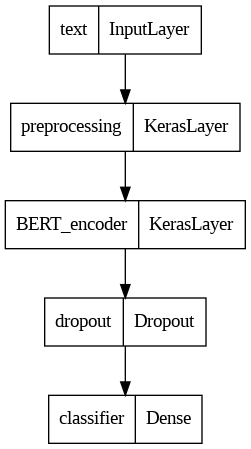

In [13]:
tf.keras.utils.plot_model(classifier_model)

#Training

In [14]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [15]:
epochs = 3
steps_per_epoch = tf.data.experimental.cardinality(train_ds).numpy()  #iterations in one epoch = total_no_of_samples / batch_size
num_train_steps = steps_per_epoch * epochs  #total number of training steps (batches) = (number of epochs) * (steps_per_epoch)
num_warmup_steps = int(0.1*num_train_steps)  #learning rate scheduling.
#During warm-up, the learning rate gradually increases from a small value to the initial learning rate.
init_lr = 1e-3 #learning rate
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [16]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [17]:
print(f'Training model with {tfhub_encoder}')
history = classifier_model.fit(x=train_ds,
                               validation_data=val_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1
Epoch 1/3
625/625 [==============================] - 288s 455ms/step - loss: 0.5104 - binary_accuracy: 0.7387 - val_loss: 0.4196 - val_binary_accuracy: 0.8114
Epoch 2/3
625/625 [==============================] - 282s 451ms/step - loss: 0.2829 - binary_accuracy: 0.8855 - val_loss: 0.4981 - val_binary_accuracy: 0.8152
Epoch 3/3
625/625 [==============================] - 279s 446ms/step - loss: 0.1341 - binary_accuracy: 0.9528 - val_loss: 0.7124 - val_binary_accuracy: 0.8142


#Evaluate

In [18]:
loss, accuracy = classifier_model.evaluate(test_ds)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

782/782 [==============================] - 95s 121ms/step - loss: 0.8460 - binary_accuracy: 0.7822
Loss: 0.8460214734077454
Accuracy: 0.7821599841117859


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


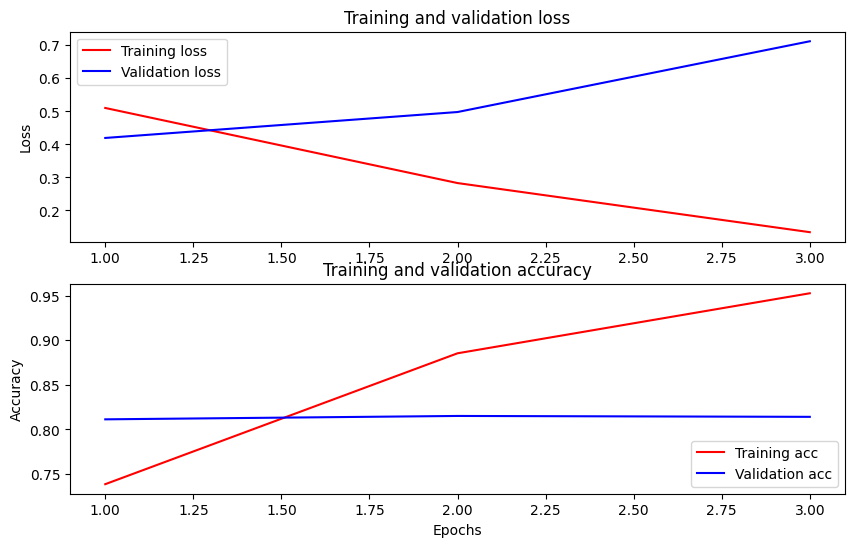

In [19]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

#inference

In [20]:
dataset_name = 'imdb'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

In [21]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [22]:
def sentiment_predict(text):
  result = reloaded_model(tf.constant(text))
  return tf.sigmoid(result[0][0])

In [31]:
prediction = sentiment_predict([input("Enter a movie review for prediction:\n")])
if prediction > 0.5:
  print("Positive review with an Probability score of:\t", prediction.numpy())
else:
  print("Negative review with an Probability score of:\t", prediction.numpy())


Enter a movie review for prediction:
It wan an amazing movie
Positive review with an Probability score of:	 0.9991664
